In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv(r'https://raw.githubusercontent.com/DwaipayanDutta/Loan-Approval-Prediction/refs/heads/main/Data/train.csv')
test_df = pd.read_csv(r'https://raw.githubusercontent.com/DwaipayanDutta/Loan-Approval-Prediction/refs/heads/main/Data/test.csv')

In [2]:
# Initial Data Overview
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

Train Data Shape: (58645, 13)
Test Data Shape: (39098, 12)


In [3]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
train_df.describe().map(lambda x: f'{x:.2f}')

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00
mean,29322.00,27.55,64046.17,4.70,9217.56,10.68,0.16,5.81,0.14
std,16929.50,6.03,37931.11,3.96,5563.81,3.03,0.09,4.03,0.35
min,0.00,20.00,4200.00,0.00,500.00,5.42,0.00,2.00,0.00
25%,14661.00,23.00,42000.00,2.00,5000.00,7.88,0.09,3.00,0.00
50%,29322.00,26.00,58000.00,4.00,8000.00,10.75,0.14,4.00,0.00
75%,43983.00,30.00,75600.00,7.00,12000.00,12.99,0.21,8.00,0.00
max,58644.00,123.00,1900000.00,123.00,35000.00,23.22,0.83,30.00,1.00


In [8]:
num = [x for x in train_df.select_dtypes(include=[np.number]).columns]
cat = [x for x in train_df.select_dtypes(include=object).columns]

# num_test = [x for x in train_df.select_dtypes(include=[np.number]).columns]
# cat_test = [x for x in train_df.select_dtypes(include=object).columns]


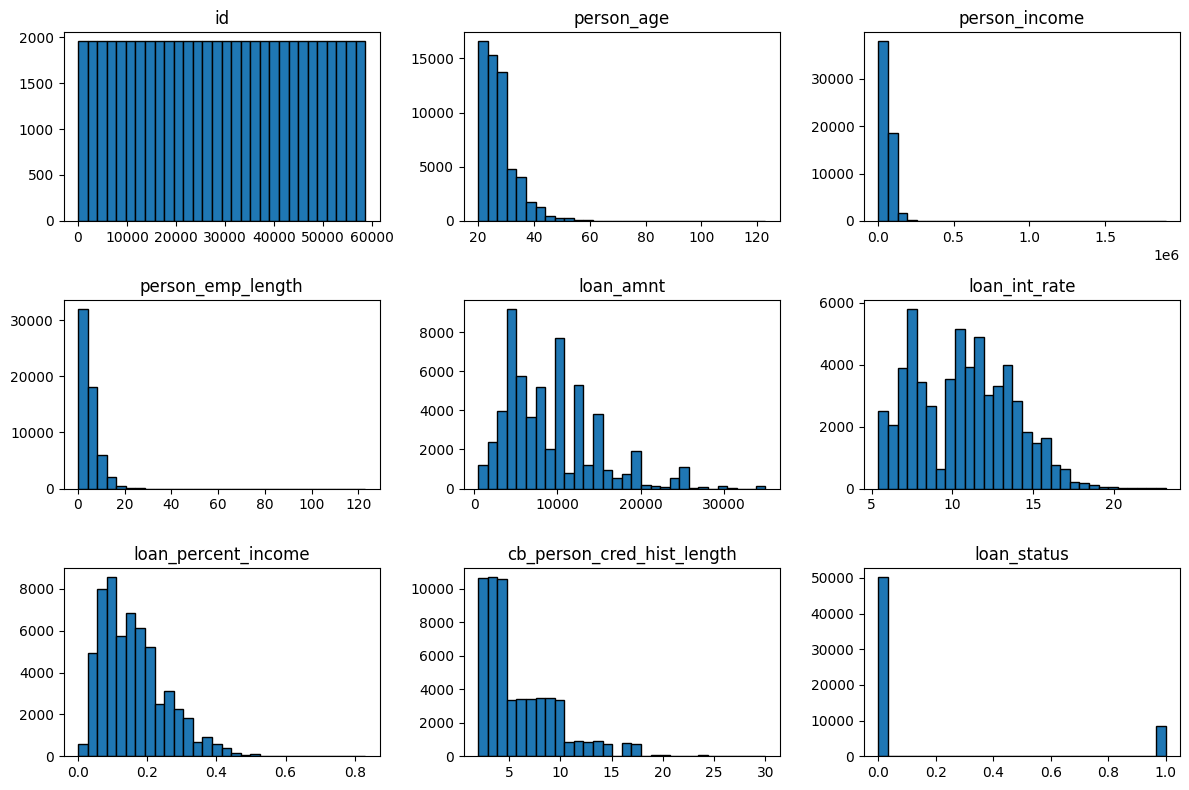

In [9]:
train_df.hist(
    figsize=(12, 8),
    grid=False,
    bins=30,
    edgecolor='black' 
)
plt.tight_layout() 
plt.show()  # Displays the histogram.

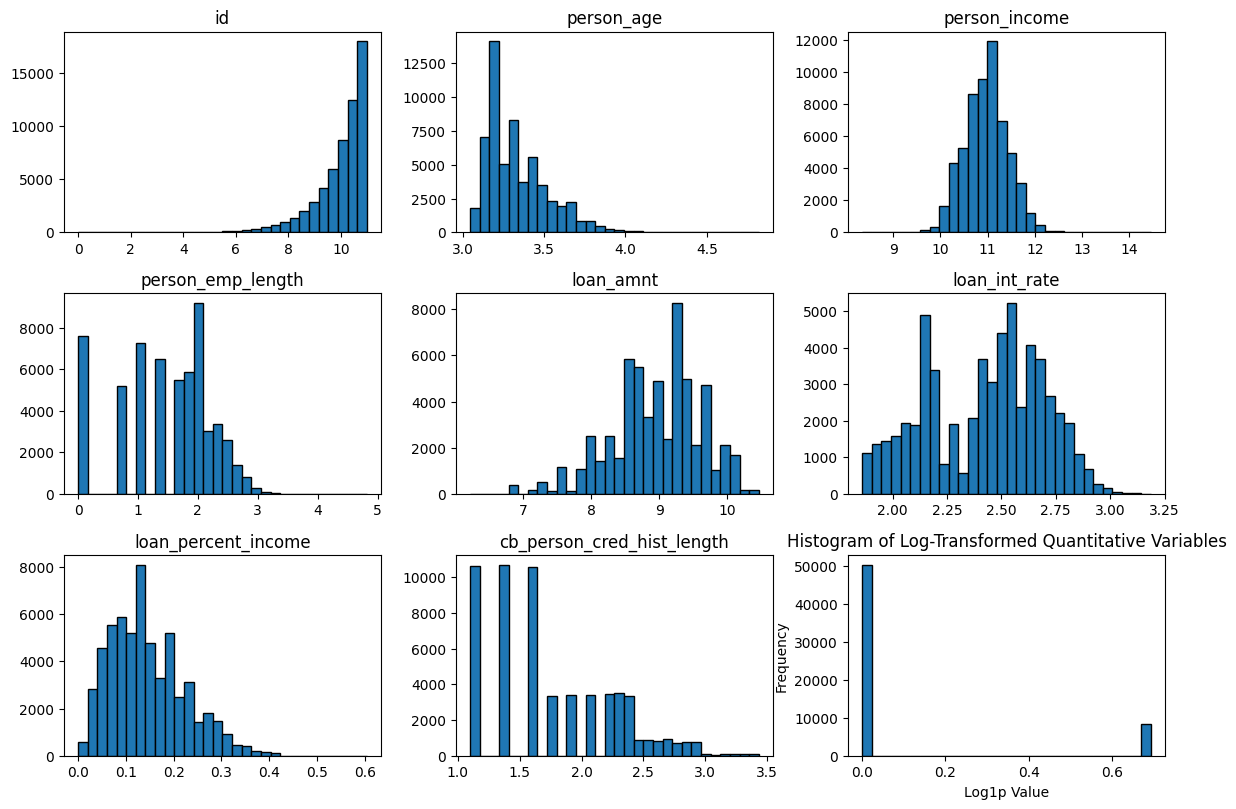

In [10]:
np.log1p(train_df[num]).hist(
    figsize=(12, 8),
    grid=False,
    bins=30,
    edgecolor='black'  
)

plt.tight_layout()  
plt.title('Histogram of Log-Transformed Quantitative Variables')  
plt.xlabel('Log1p Value')  
plt.ylabel('Frequency')  
plt.show()  

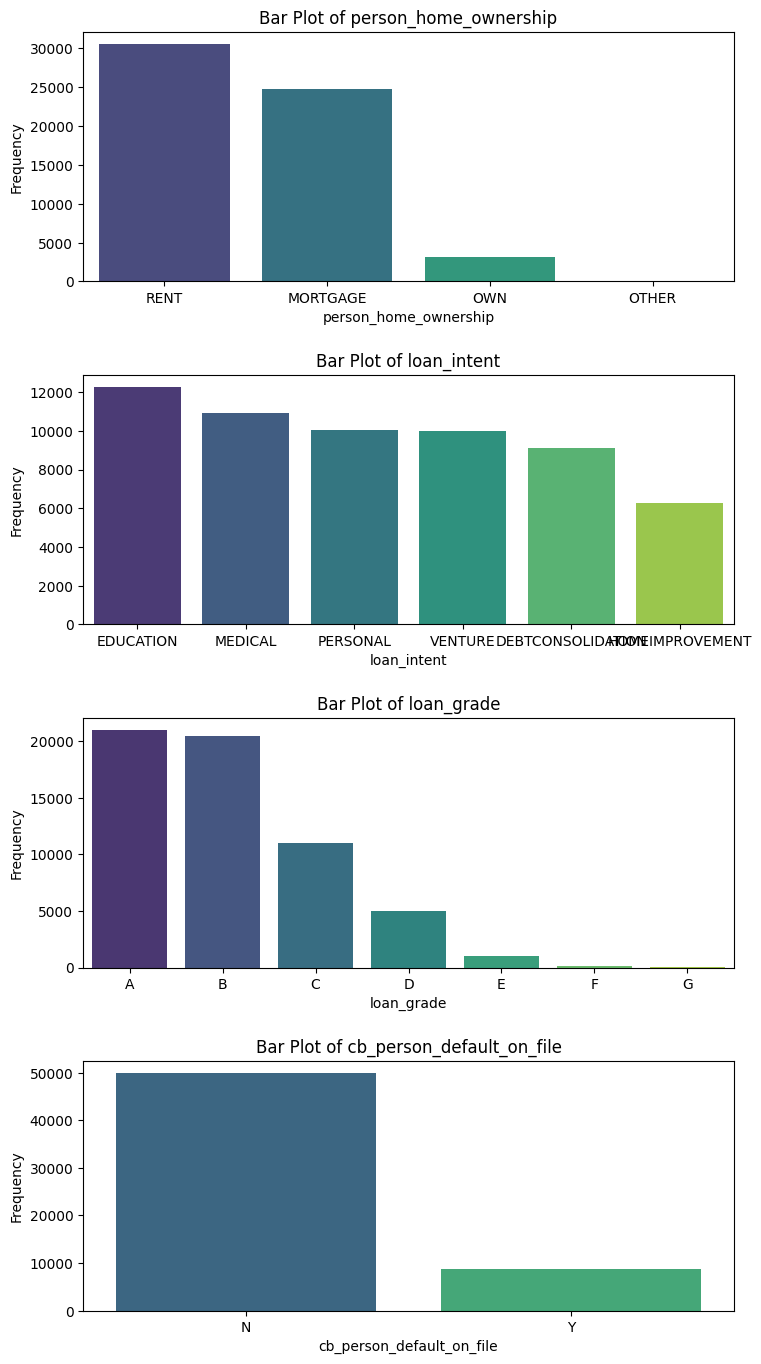

In [11]:
fig, axes = plt.subplots(len(train_df[cat].columns), 1, figsize=(8, 14))
for i, var in enumerate(train_df[cat].columns):
    value_counts = train_df[cat][var].value_counts()

    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        hue=value_counts.index,  
        ax=axes[i],
        palette='viridis',  
        legend=False 
    )

    axes[i].set_title(f'Bar Plot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(pad=2.0)
plt.show()

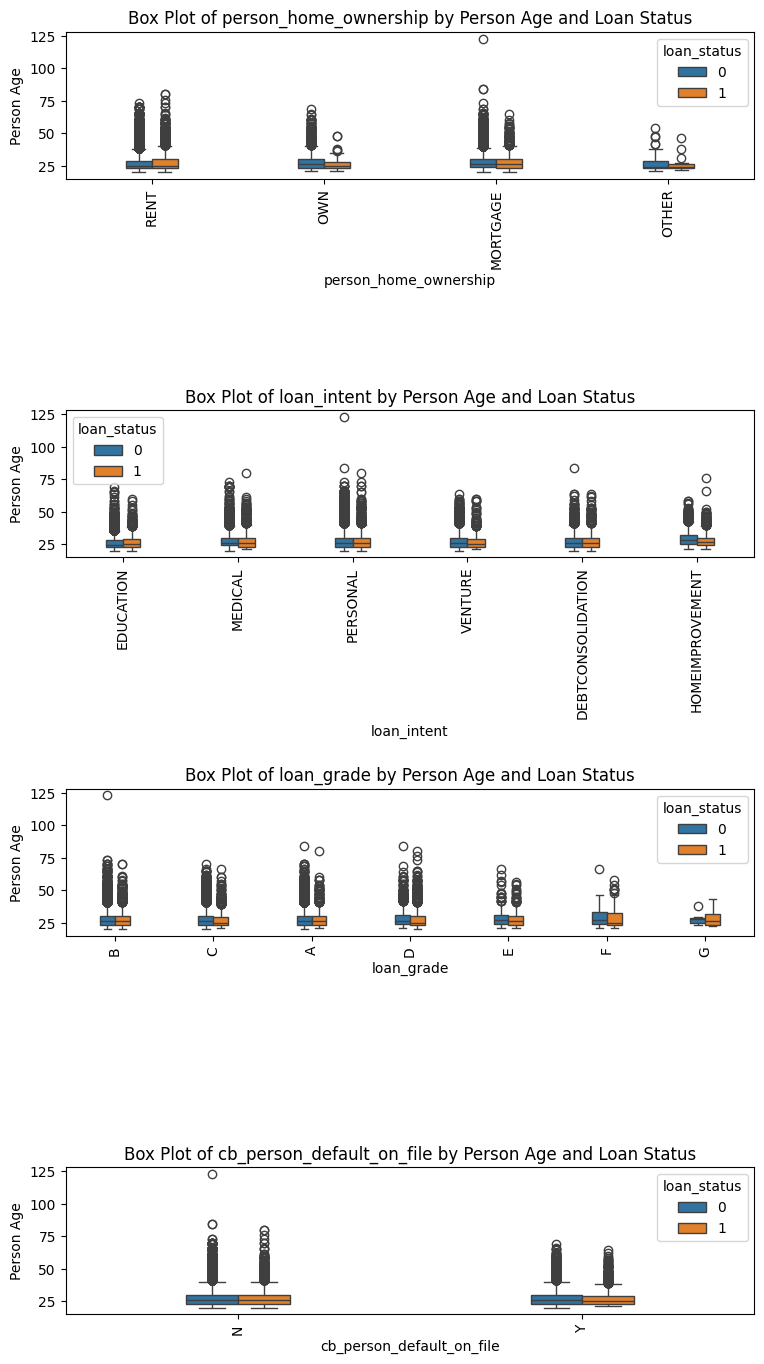

In [12]:
fig, axes = plt.subplots(len(train_df[cat].columns), 1, figsize=(8, 14))
for i, var in enumerate(train_df[cat].columns):
    sns.boxplot(
        x=train_df[var], 
        y=train_df["person_age"], 
        hue=train_df['loan_status'], 
        width=0.3, 
        ax=axes[i]  
    )
    
    axes[i].set_title(f'Box Plot of {var} by Person Age and Loan Status')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Person Age')

    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout(pad=2.0)
plt.show()

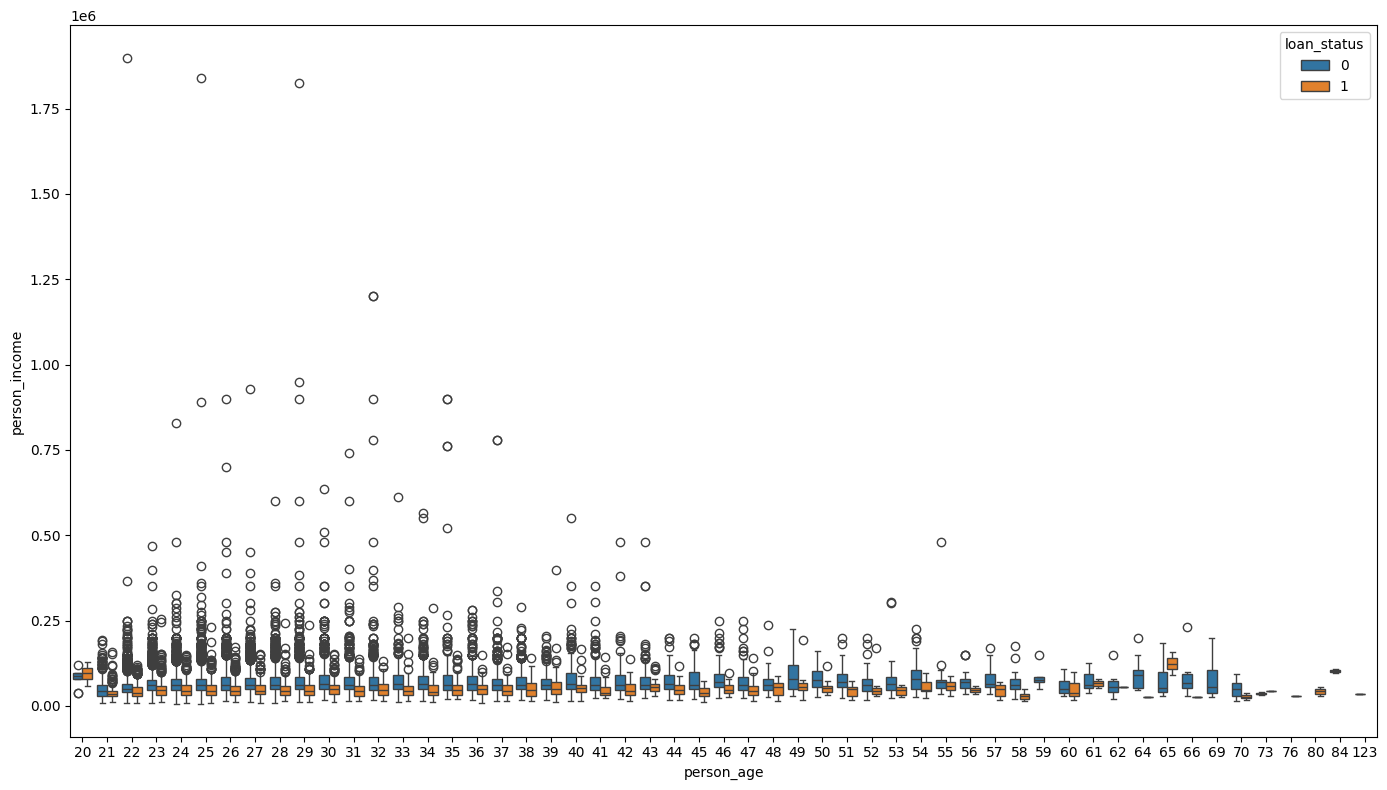

In [13]:
plt.subplots(figsize=(14,8))
sns.boxplot(x=train_df['person_age'], y=train_df['person_income'], hue=train_df['loan_status'])
plt.tight_layout();

In [14]:
le = LabelEncoder()
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = le.fit_transform(train_df[col])

In [15]:
# Prepare features and target variable
X = train_df.drop('loan_status', axis=1)  
y = train_df['loan_status']  # Target variable
# Identify numeric features for scaling
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_features])  # Scale only numeric features

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model with increased max_iter
lr = LogisticRegression(class_weight='balanced', max_iter=200)
lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lr.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')  # Print accuracy

# Display classification report
cr = classification_report(y_val, y_pred)
print("Classification Report:\n", cr)

# Ensure that test_df is preprocessed similarly to train_df and contains only numeric data
# Check if 'loan_status' is present in test_df (it shouldn't be)
if 'loan_status' in test_df.columns:
    test_df.drop('loan_status', axis=1, inplace=True)  # Remove if present

# Scale only numeric features from test_df
test_scaled = scaler.transform(test_df[numeric_features])  # Use only numeric features for scaling

# Perform predictions on the scaled test dataset
y_pred_test = lr.predict(test_scaled)  # Predictions for test data

# Get predicted probabilities for the positive class
y_pred_test_proba = lr.predict_proba(test_scaled)[:, 1]  # Probability of loan_status being 1

# Prepare submission DataFrame (make sure 'id' exists in test_df)
lr_submission = pd.DataFrame({
    'id': test_df['id'], 
    'loan_status': y_pred_test_proba  # Use predicted probabilities for submission
})

# Display the first few rows of the submission DataFrame
print(lr_submission.head())

Validation Accuracy: 0.7792
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     10087
           1       0.37      0.80      0.50      1642

    accuracy                           0.78     11729
   macro avg       0.66      0.79      0.68     11729
weighted avg       0.88      0.78      0.81     11729

      id  loan_status
0  58645     0.928655
1  58646     0.213420
2  58647     0.852315
3  58648     0.187092
4  58649     0.572563
